[Troubleshooting and Solving Data Join Pitfalls](https://www.cloudskillsboost.google/focuses/3638?parent=catalog)

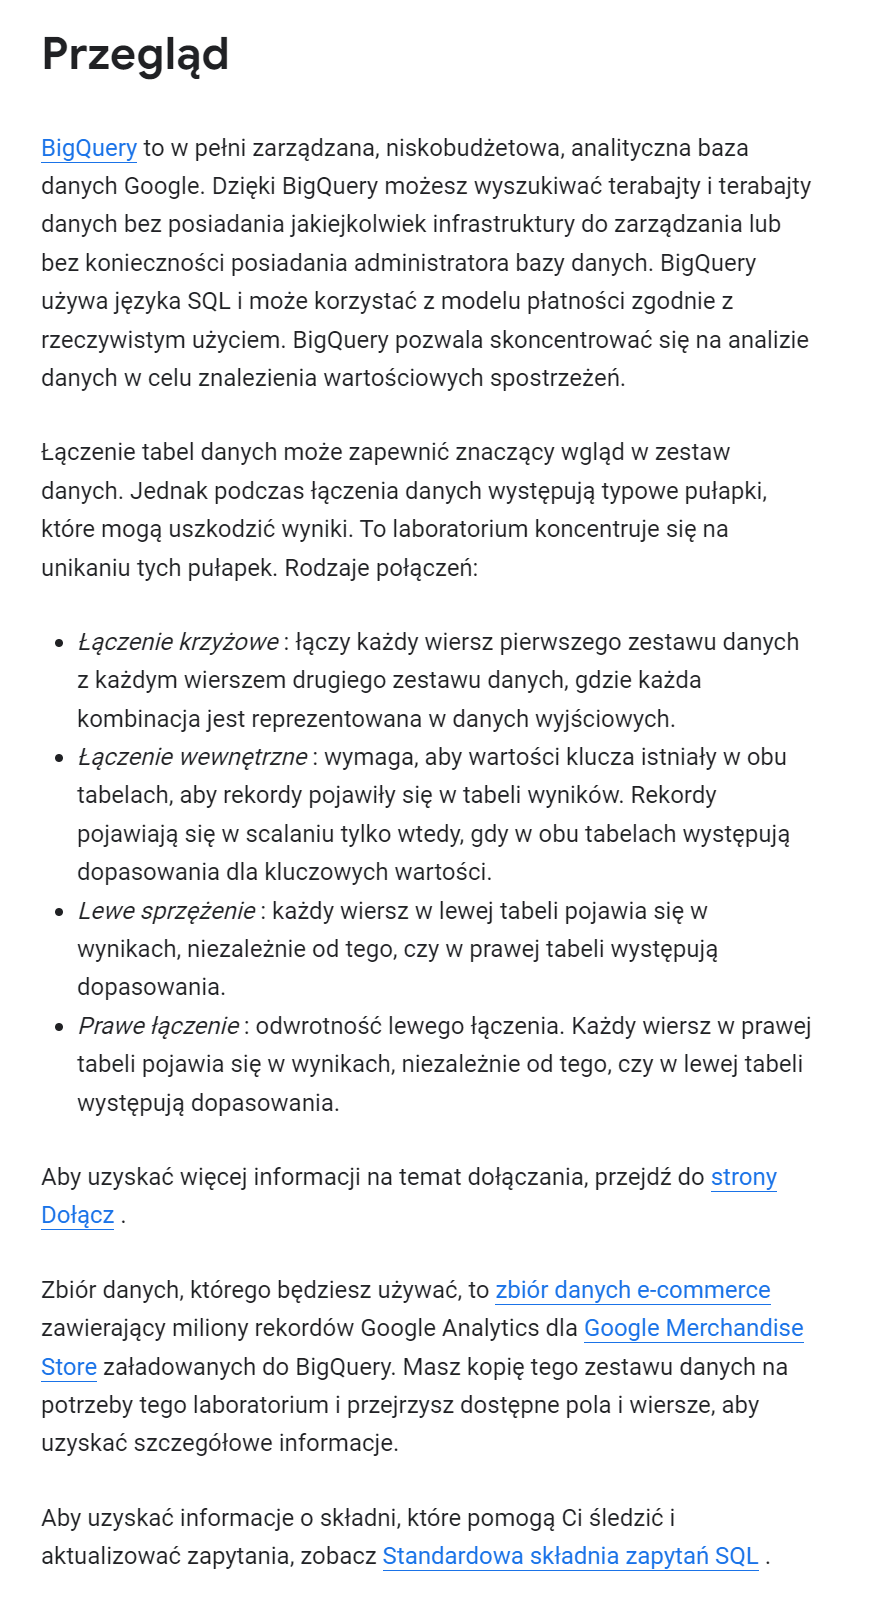

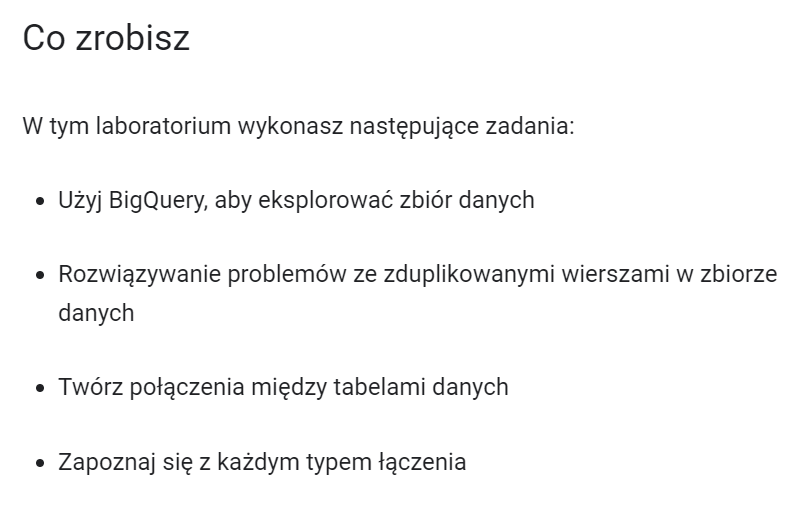

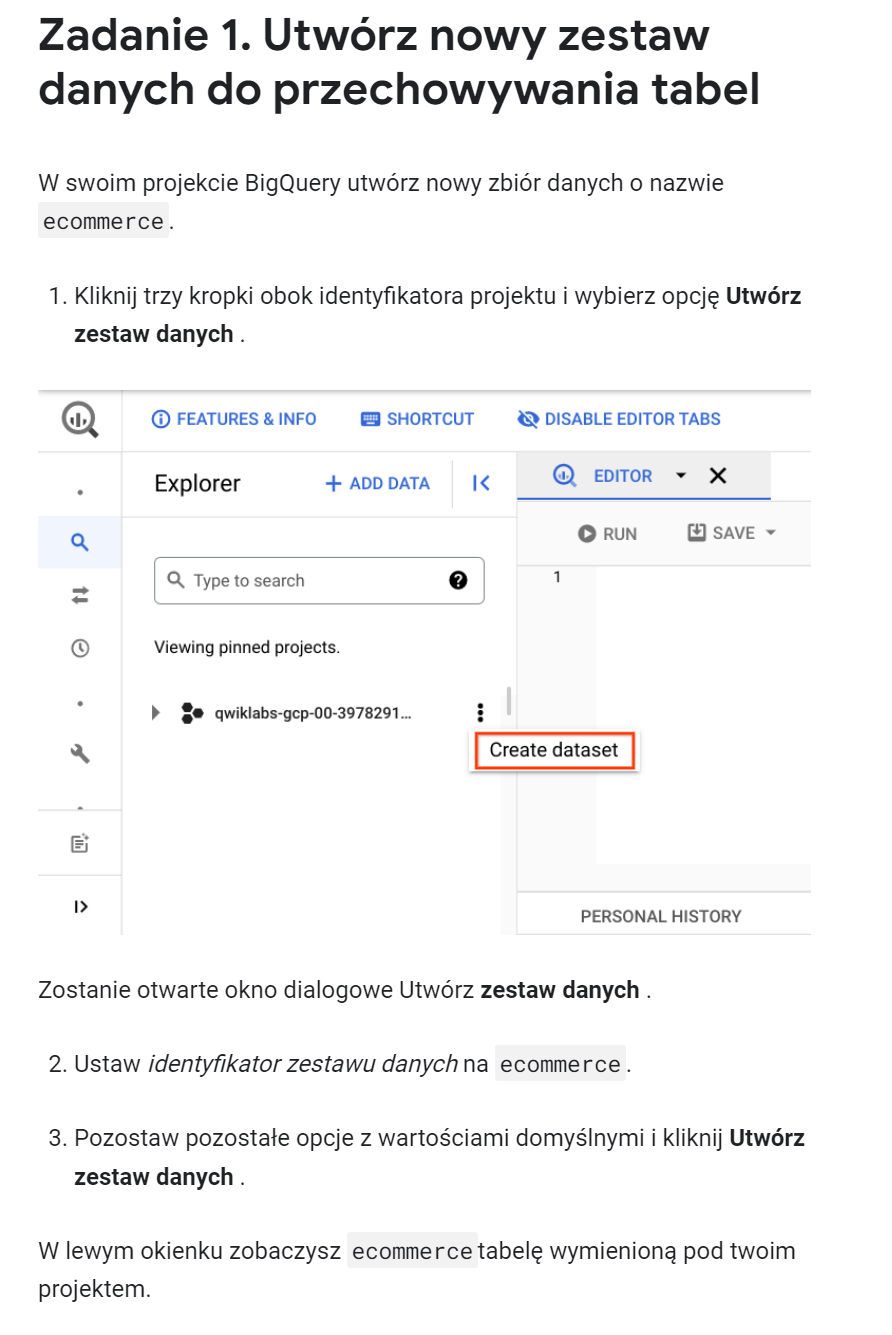

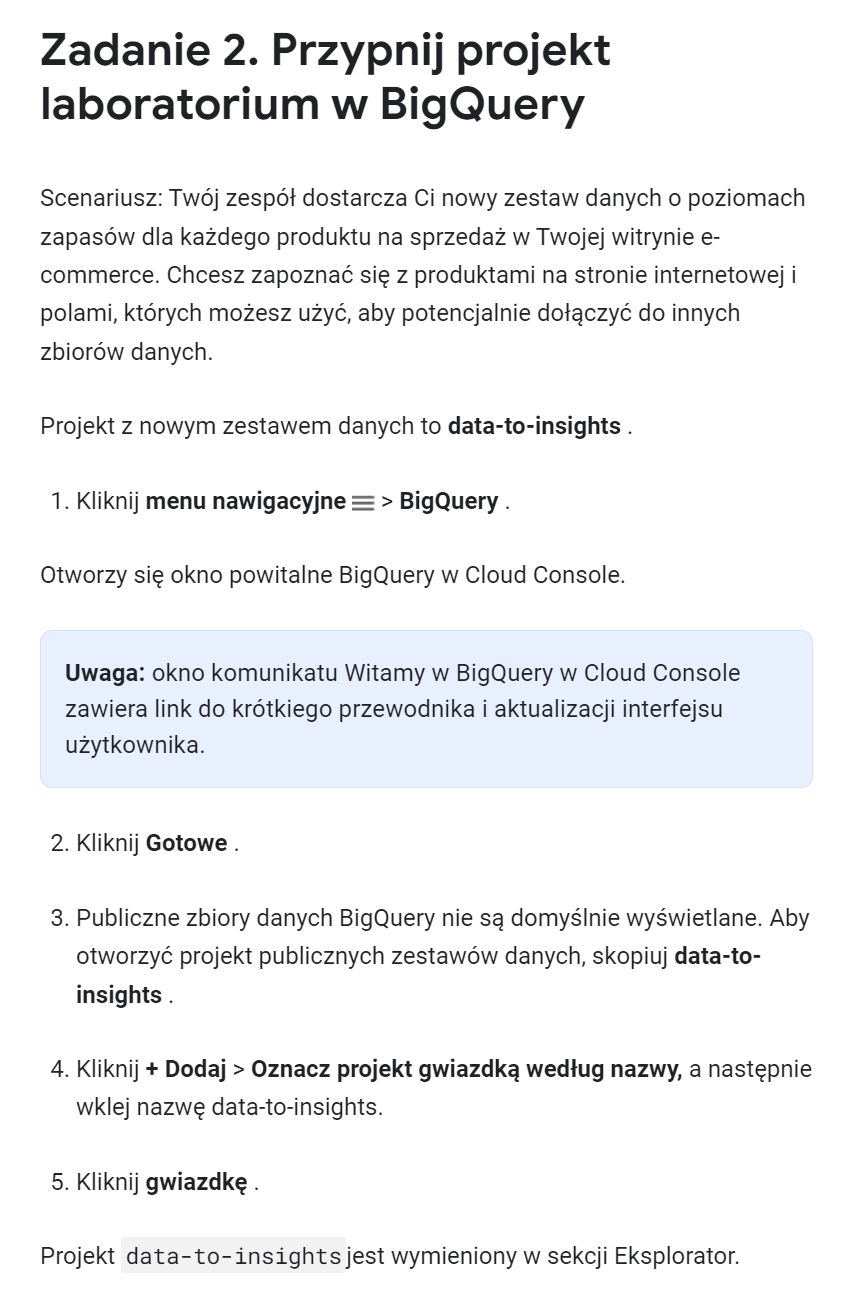

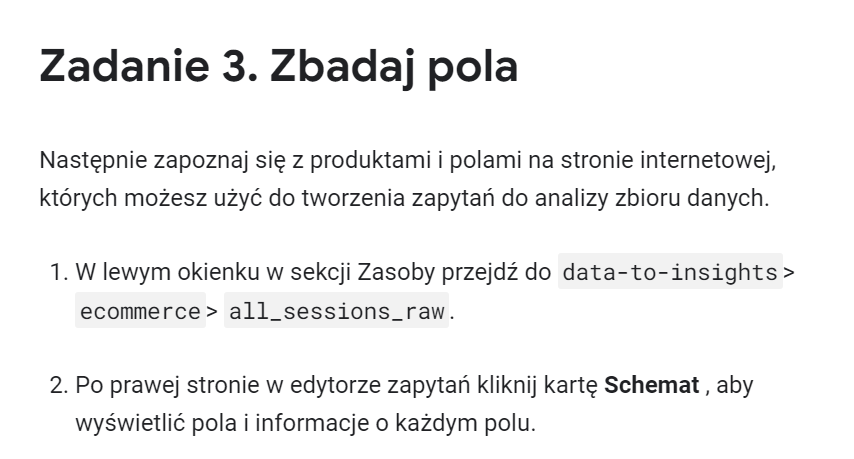

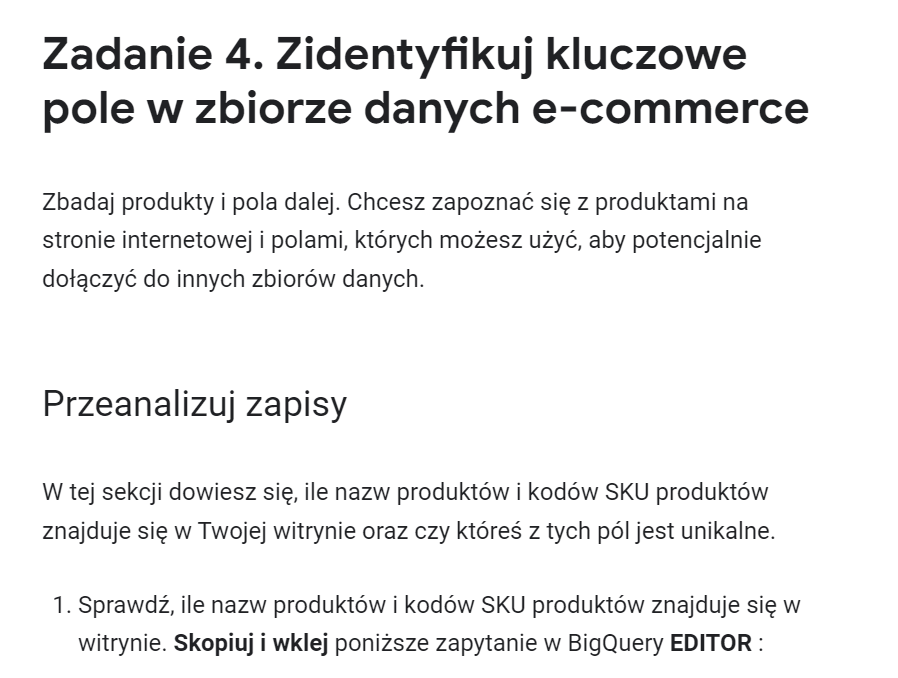

In [ ]:
%%bigquery

# how many products are on the website?
SELECT DISTINCT
productSKU,
v2ProductName
FROM `data-to-insights.ecommerce.all_sessions_raw`

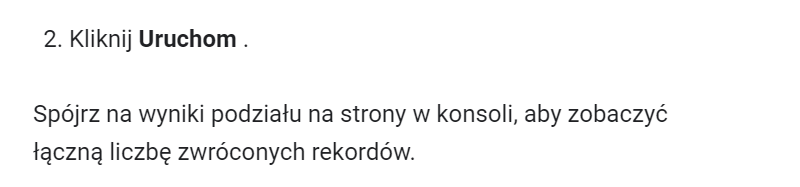

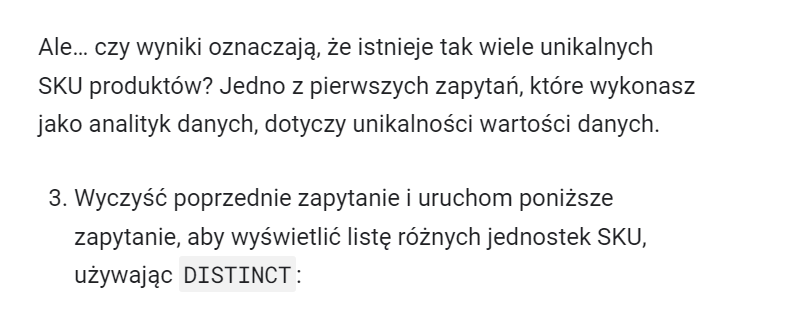

In [ ]:
%%bigquery

# find the count of unique SKUs
SELECT
DISTINCT
productSKU
FROM `data-to-insights.ecommerce.all_sessions_raw`

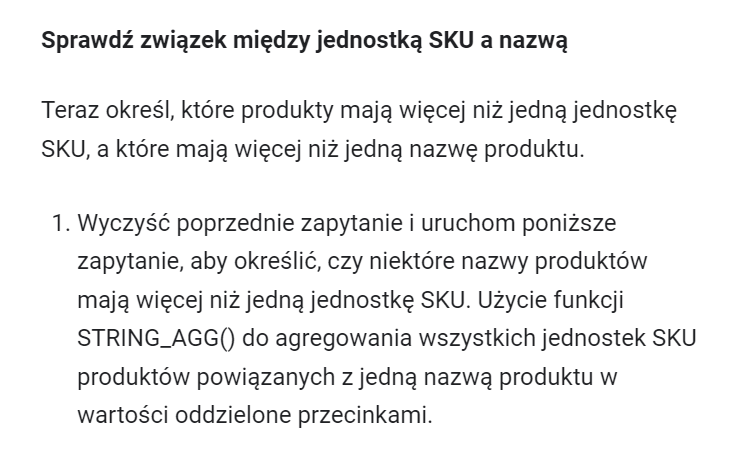

In [ ]:
%%bigquery

SELECT
  v2ProductName,
  COUNT(DISTINCT productSKU) AS SKU_count,
  STRING_AGG(DISTINCT productSKU LIMIT 5) AS SKU
FROM `data-to-insights.ecommerce.all_sessions_raw`
  WHERE productSKU IS NOT NULL
  GROUP BY v2ProductName
  HAVING SKU_count > 1
  ORDER BY SKU_count DESC

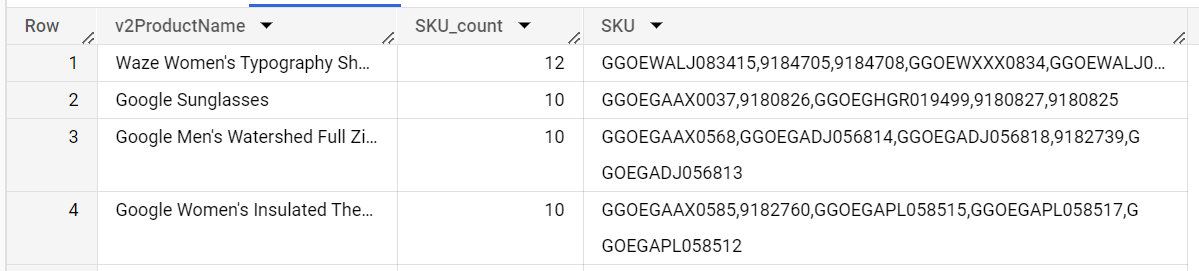

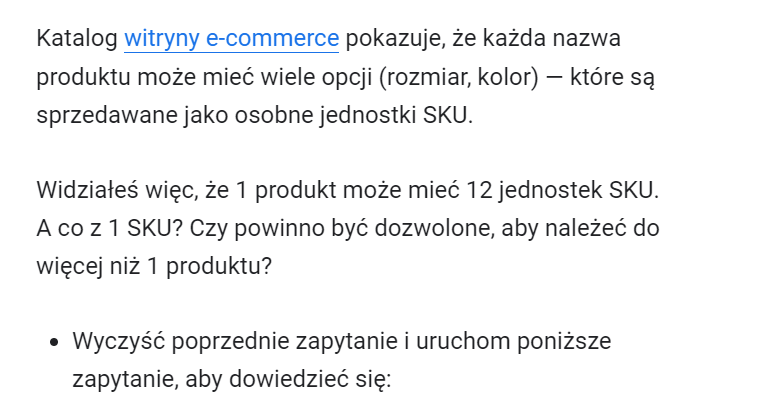

In [ ]:
%%bigquery

SELECT
  productSKU,
  COUNT(DISTINCT v2ProductName) AS product_count,
  STRING_AGG(DISTINCT v2ProductName LIMIT 5) AS product_name
FROM `data-to-insights.ecommerce.all_sessions_raw`
  WHERE v2ProductName IS NOT NULL
  GROUP BY productSKU
  HAVING product_count > 1
  ORDER BY product_count DESC

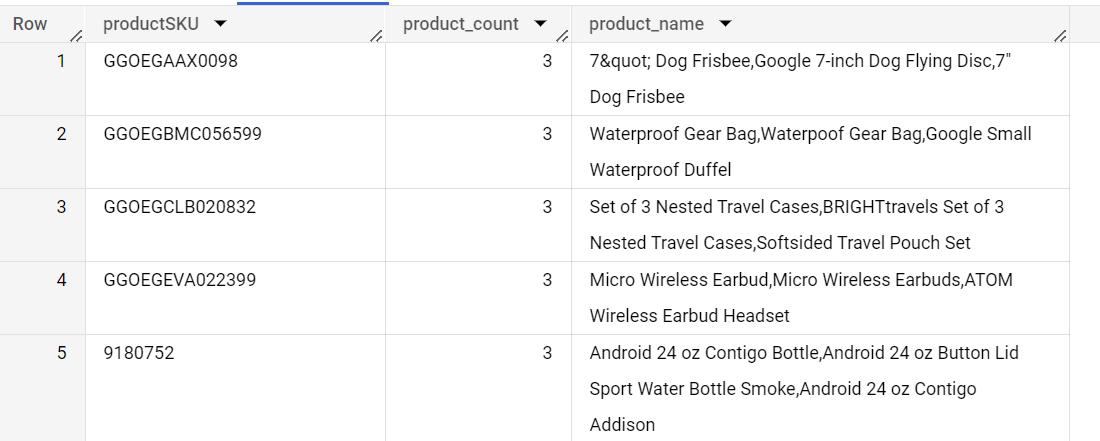

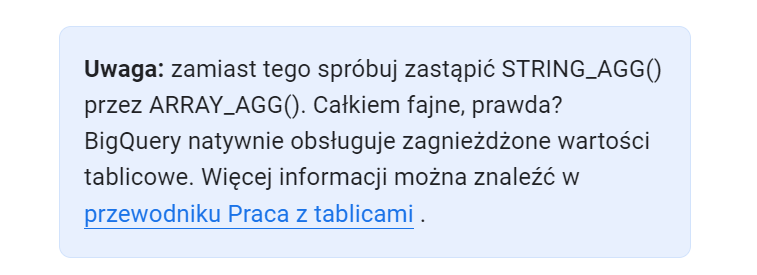

In [ ]:
%%bigquery

SELECT
  productSKU,
  COUNT(DISTINCT v2ProductName) AS product_count,
  ARRAY_AGG(DISTINCT v2ProductName LIMIT 5) AS product_name
FROM `data-to-insights.ecommerce.all_sessions_raw`
  WHERE v2ProductName IS NOT NULL
  GROUP BY productSKU
  HAVING product_count > 1
  ORDER BY product_count DESC

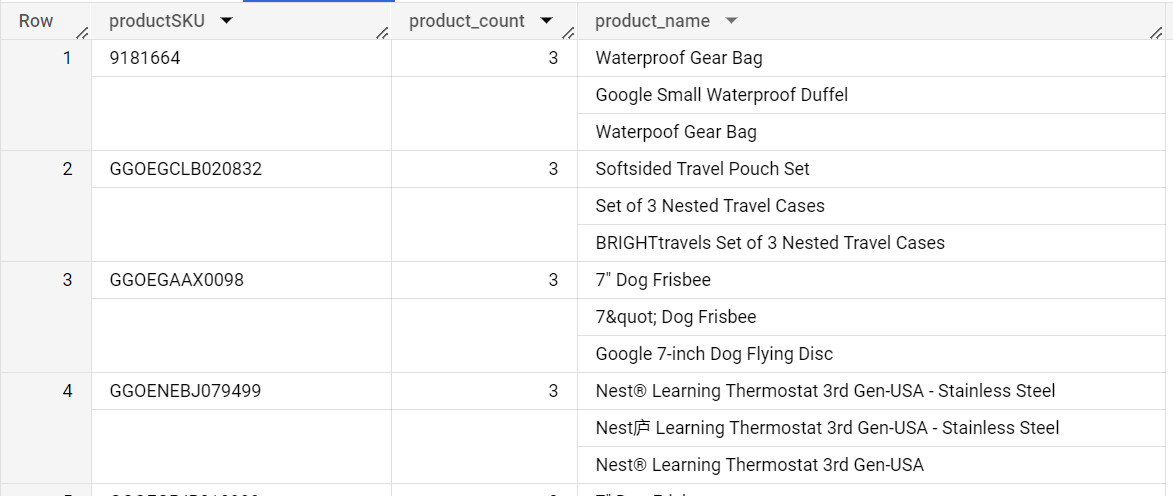

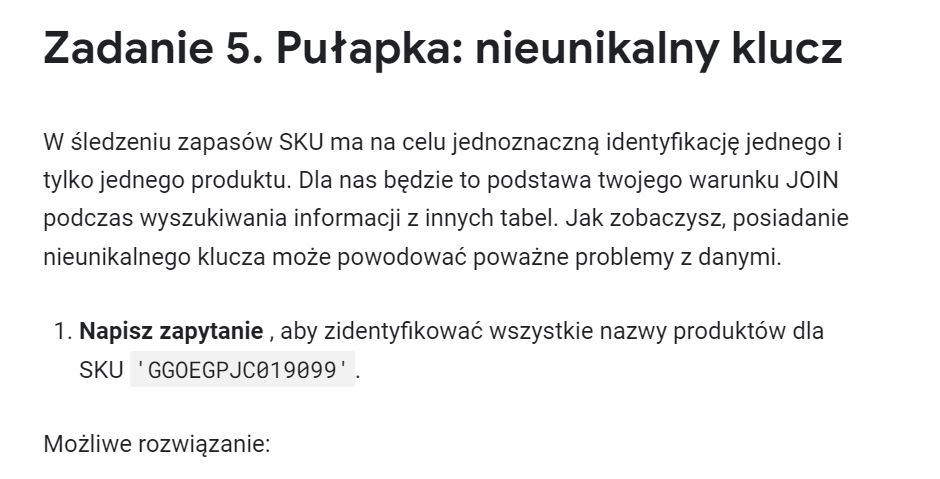

In [ ]:
%%bigquery

SELECT DISTINCT
  v2ProductName,
  productSKU
FROM `data-to-insights.ecommerce.all_sessions_raw`
WHERE productSKU = 'GGOEGPJC019099'

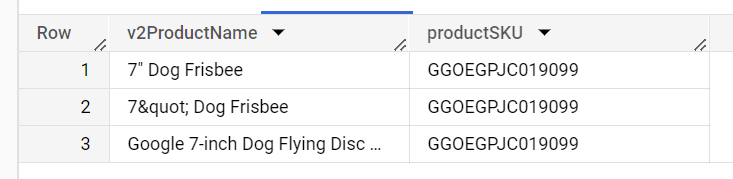

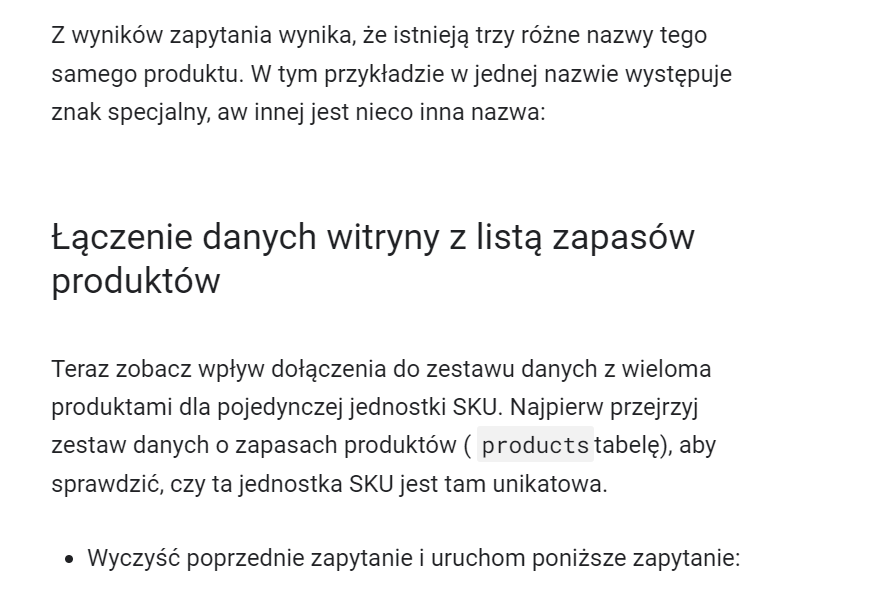

In [ ]:
%%bigquery

SELECT
  SKU,
  name,
  stockLevel
FROM `data-to-insights.ecommerce.products`
WHERE SKU = 'GGOEGPJC019099'

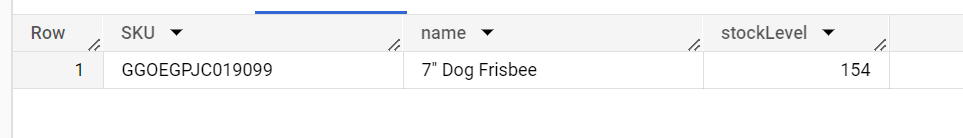

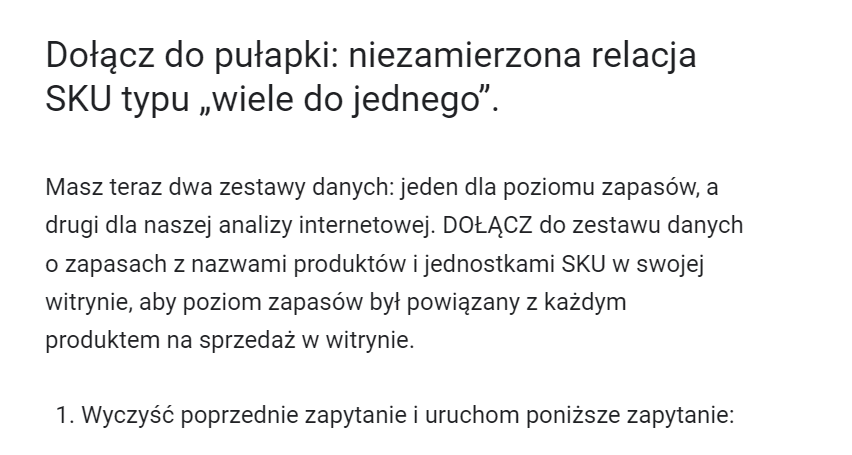

In [ ]:
%%bigquery

SELECT DISTINCT
  website.v2ProductName,
  website.productSKU,
  inventory.stockLevel
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
JOIN `data-to-insights.ecommerce.products` AS inventory
  ON website.productSKU = inventory.SKU
  WHERE productSKU = 'GGOEGPJC019099'

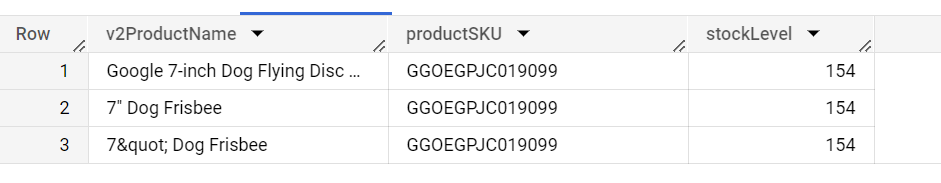

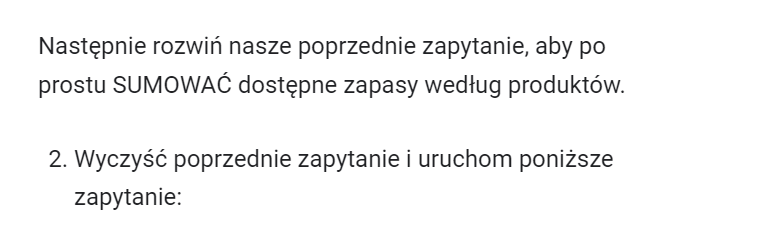

In [ ]:
%%bigquery

WITH inventory_per_sku AS (
  SELECT DISTINCT
    website.v2ProductName,
    website.productSKU,
    inventory.stockLevel
  FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
  JOIN `data-to-insights.ecommerce.products` AS inventory
    ON website.productSKU = inventory.SKU
    WHERE productSKU = 'GGOEGPJC019099'
)
SELECT
  productSKU,
  SUM(stockLevel) AS total_inventory
FROM inventory_per_sku
GROUP BY productSKU

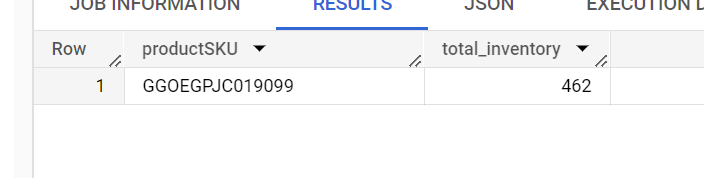

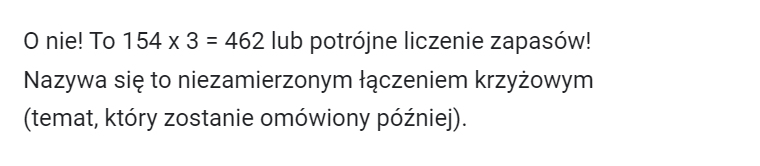

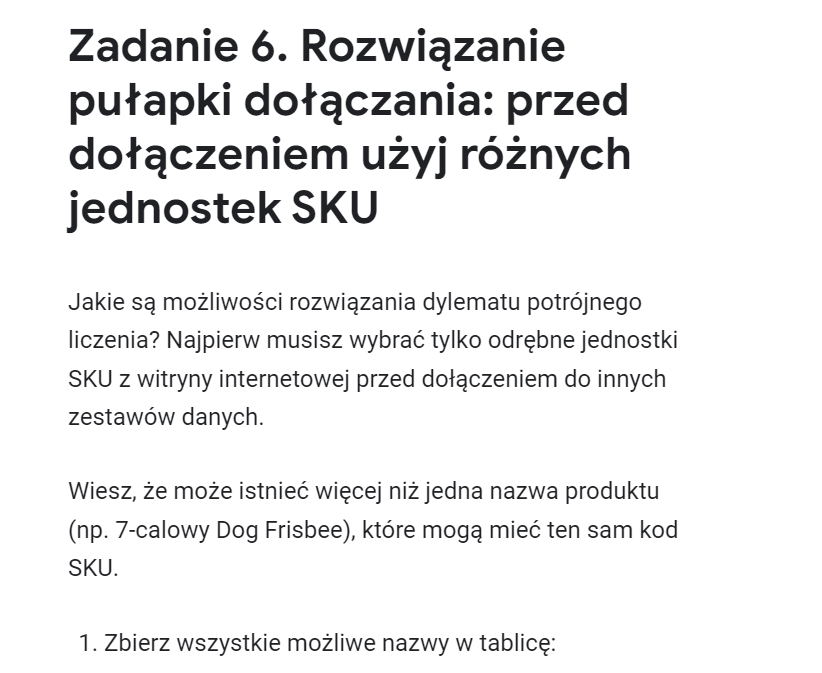

In [ ]:
%%bigquery

SELECT
  productSKU,
  ARRAY_AGG(DISTINCT v2ProductName) AS push_all_names_into_array
FROM `data-to-insights.ecommerce.all_sessions_raw`
WHERE productSKU = 'GGOEGAAX0098'
GROUP BY productSKU

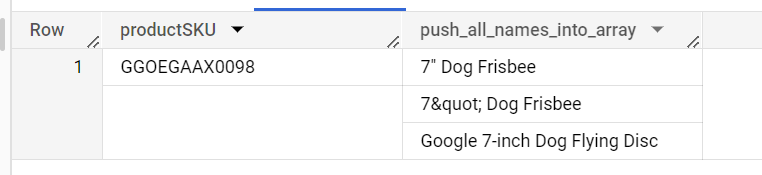

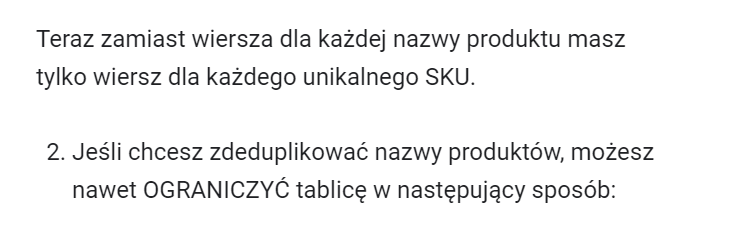

In [ ]:
%%bigquery

SELECT
  productSKU,
  ARRAY_AGG(DISTINCT v2ProductName LIMIT 1) AS push_all_names_into_array
FROM `data-to-insights.ecommerce.all_sessions_raw`
WHERE productSKU = 'GGOEGAAX0098'
GROUP BY productSKU

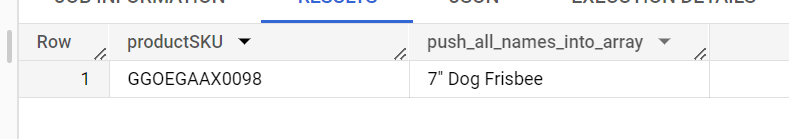

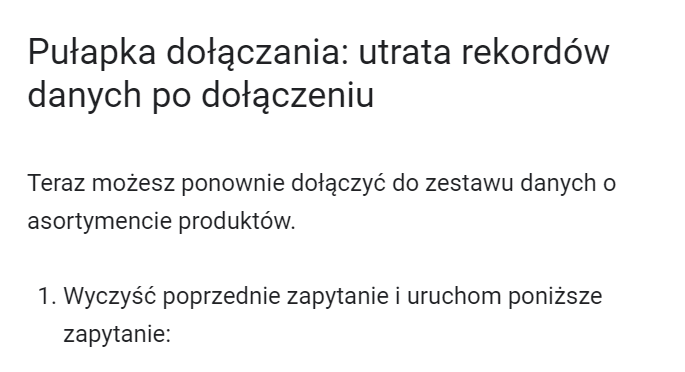

In [ ]:
%%bigquery

SELECT DISTINCT
website.productSKU
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU

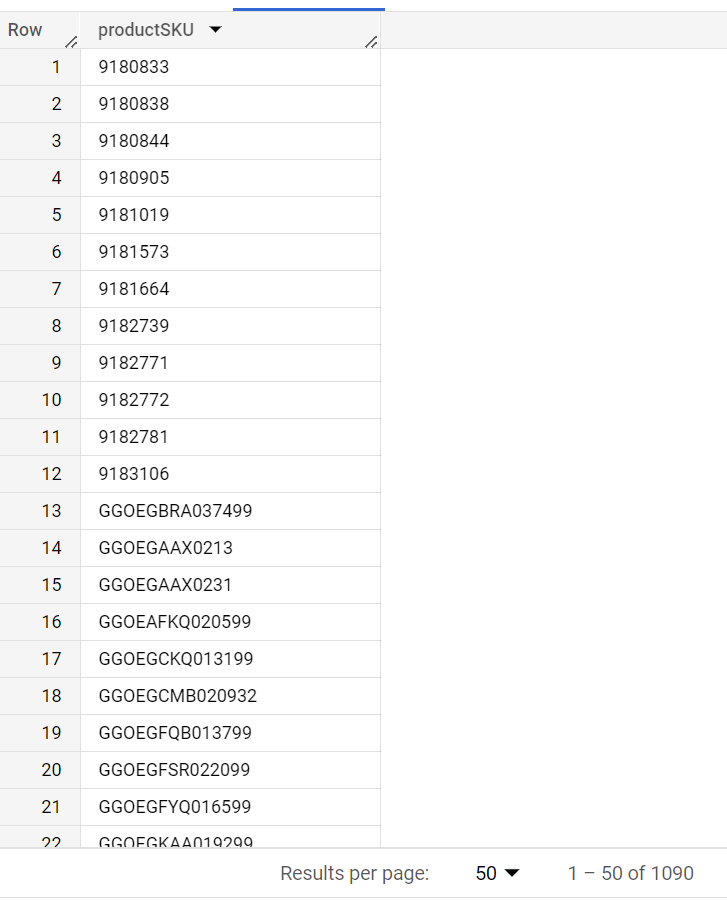

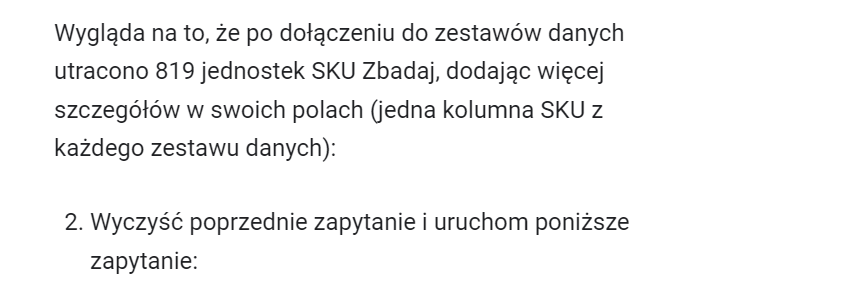

In [ ]:
%%bigquery

SELECT DISTINCT
website.productSKU AS website_SKU,
inventory.SKU AS inventory_SKU
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU
# IDs are present in both tables, how can you dig deeper?

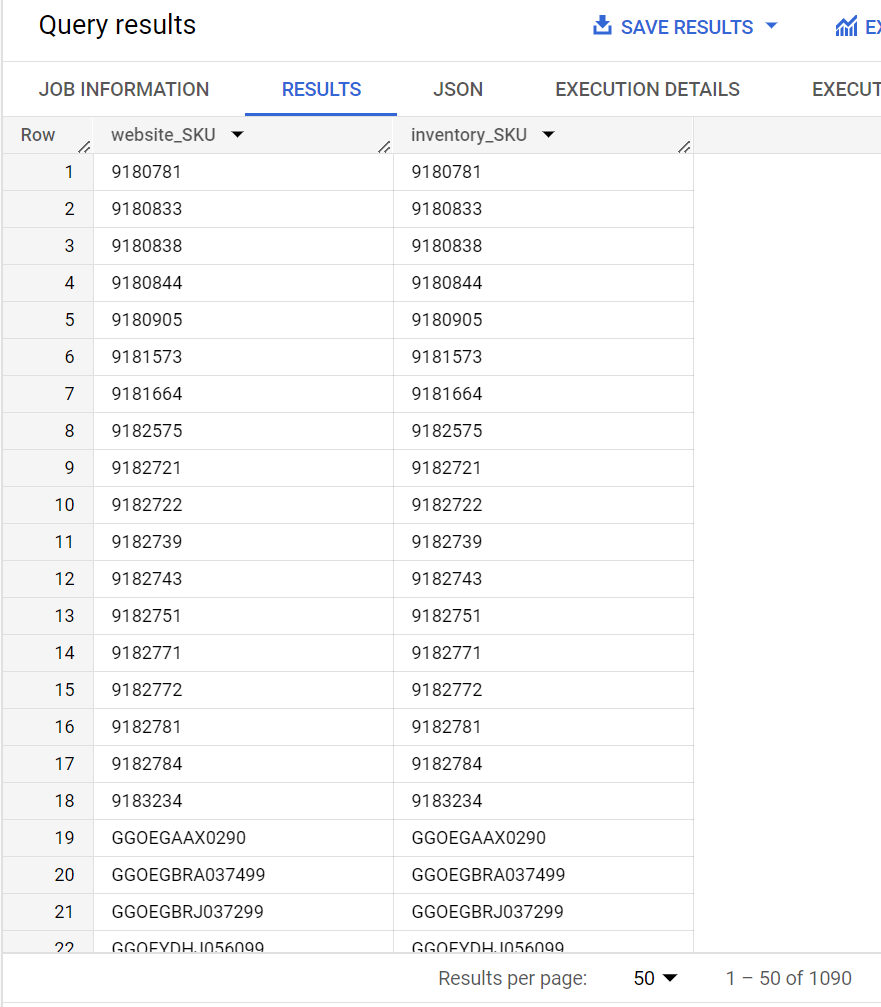

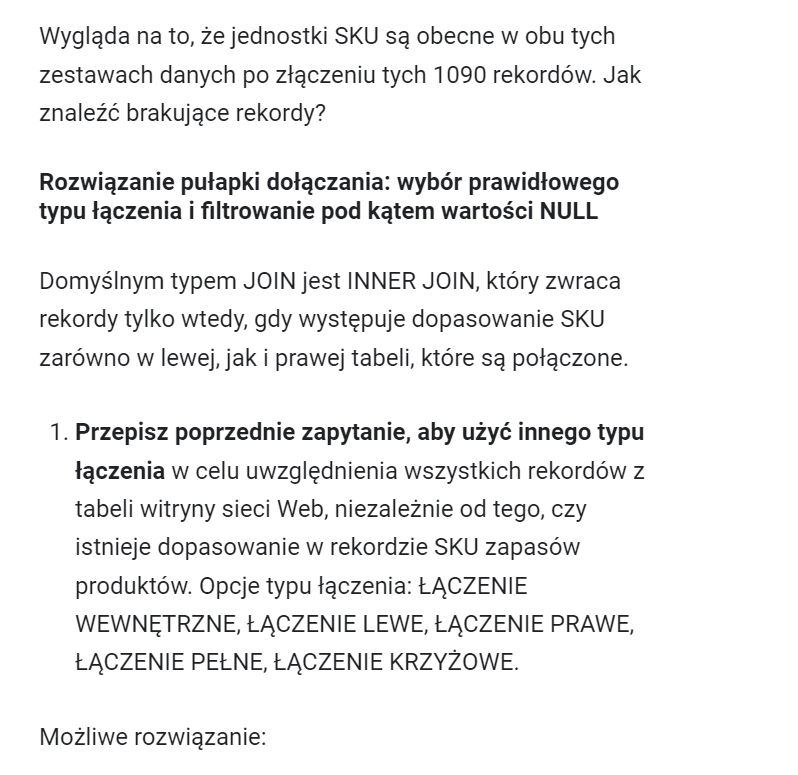

In [ ]:
%%bigquery

#standardSQL
# the secret is in the JOIN type
# pull ID fields from both tables
SELECT DISTINCT
website.productSKU AS website_SKU,
inventory.SKU AS inventory_SKU
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
LEFT JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU

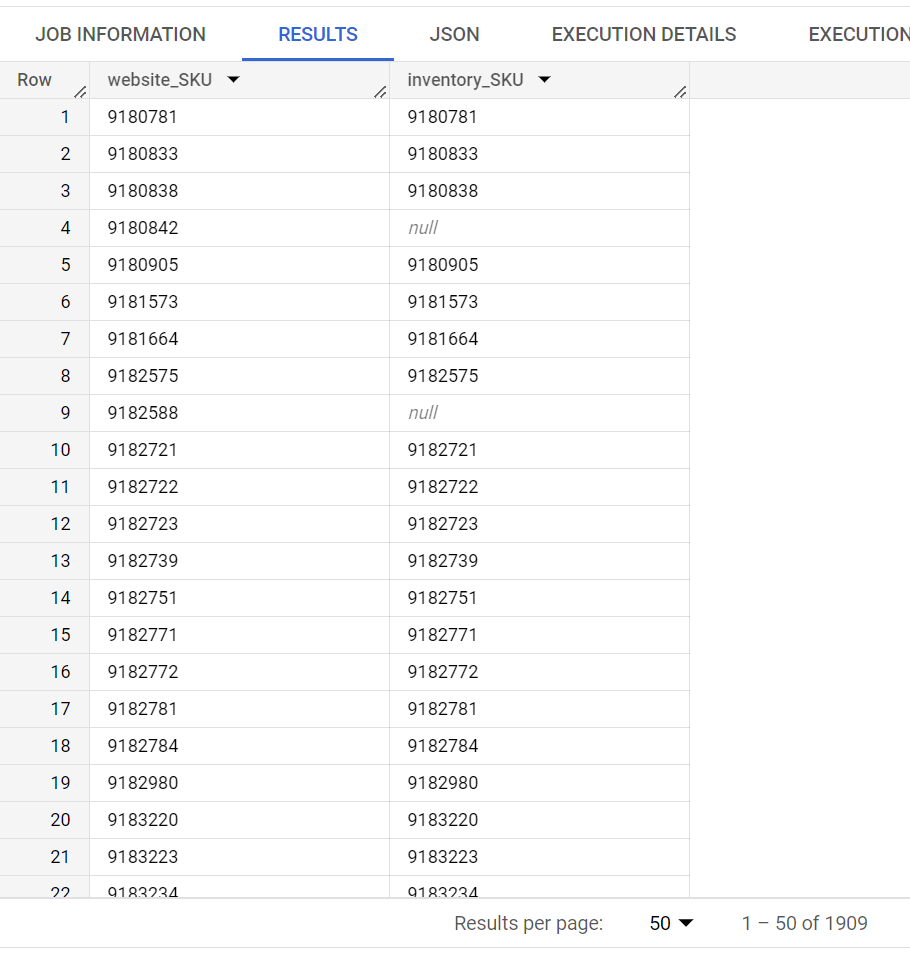

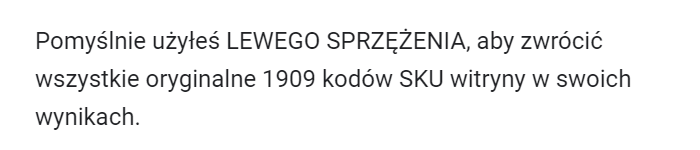

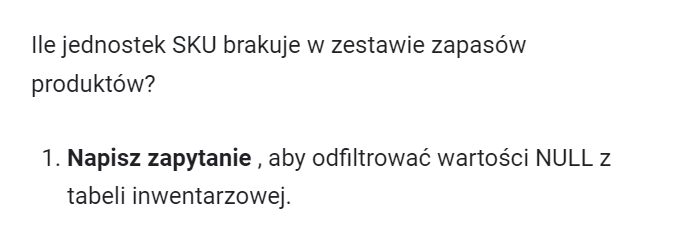

In [ ]:
%%bigquery

#standardSQL
# find product SKUs in website table but not in product inventory table
SELECT DISTINCT
website.productSKU AS website_SKU,
inventory.SKU AS inventory_SKU
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
LEFT JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU
WHERE inventory.SKU IS NULL

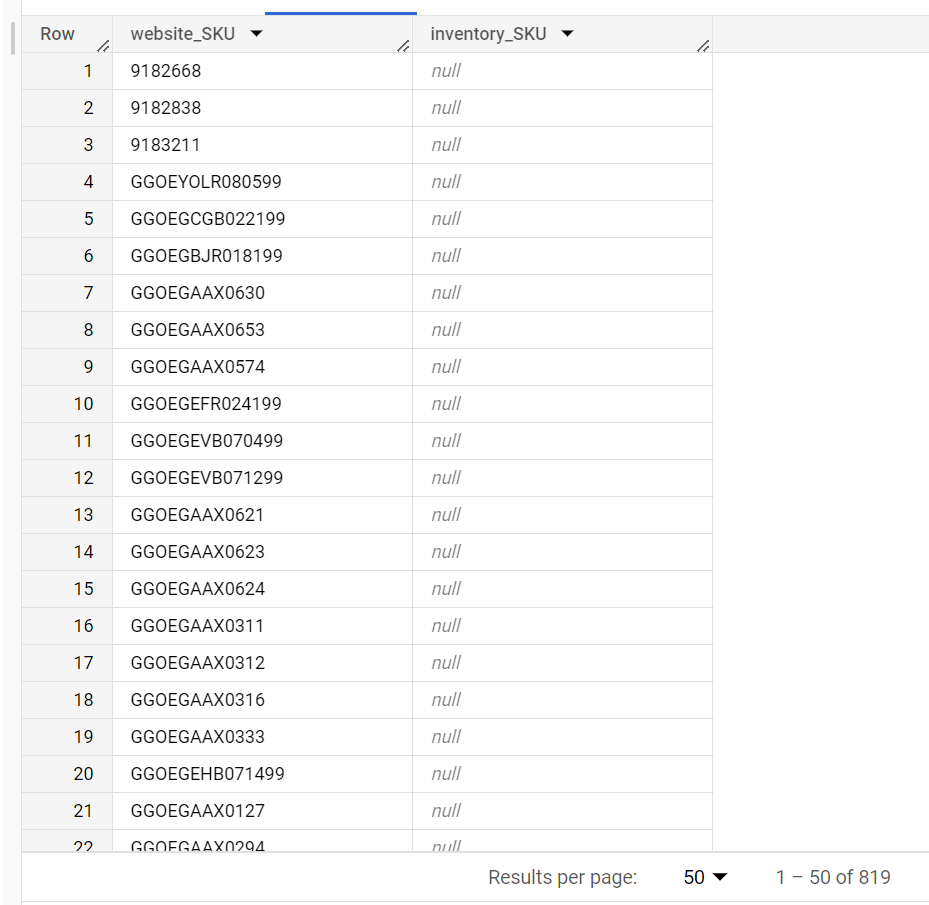

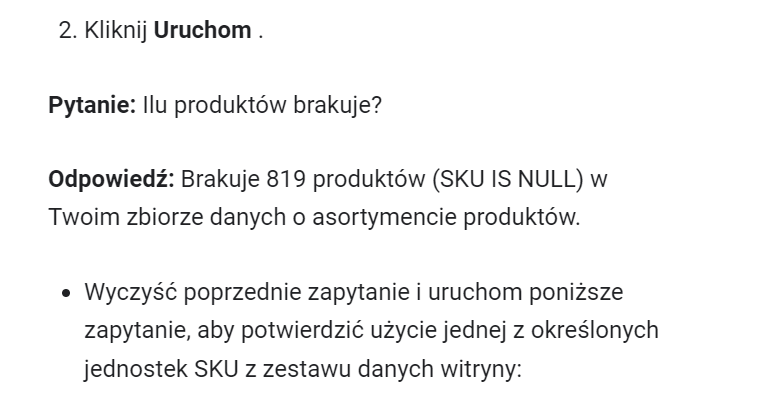

In [ ]:
%%bigquery

#standardSQL
# you can even pick one and confirm
SELECT * FROM `data-to-insights.ecommerce.products`
WHERE SKU = 'GGOEGATJ060517'
# query returns zero results

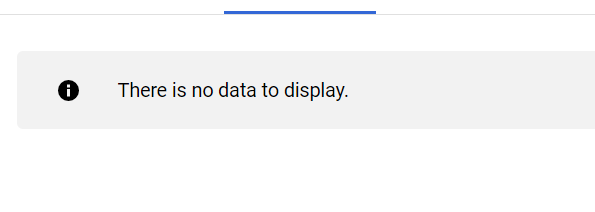

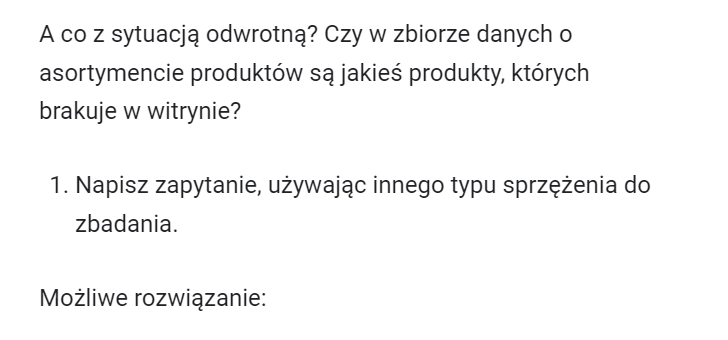

In [ ]:
%%bigquery

# reverse the join
# find records in website but not in inventory
SELECT DISTINCT
website.productSKU AS website_SKU,
inventory.SKU AS inventory_SKU
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
RIGHT JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU
WHERE website.productSKU IS NULL

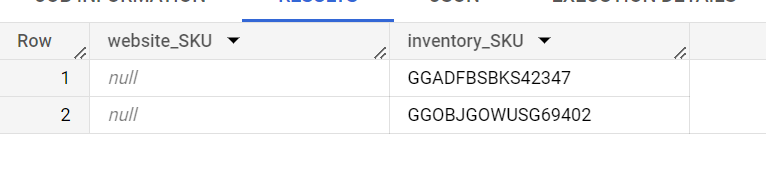

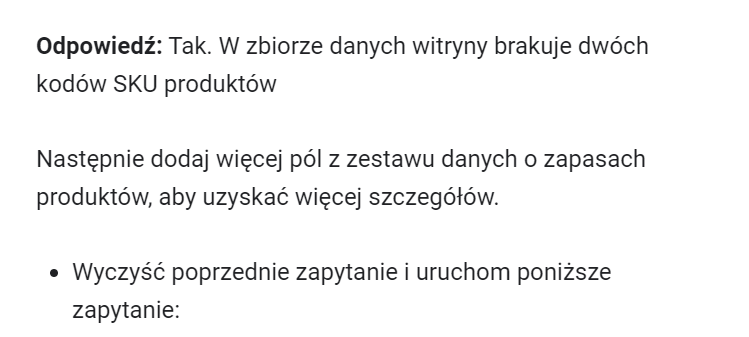

In [ ]:
%%bigquery

#standardSQL
# what are these products?
# add more fields in the SELECT STATEMENT
SELECT DISTINCT
website.productSKU AS website_SKU,
inventory.*
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
RIGHT JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU
WHERE website.productSKU IS NULL

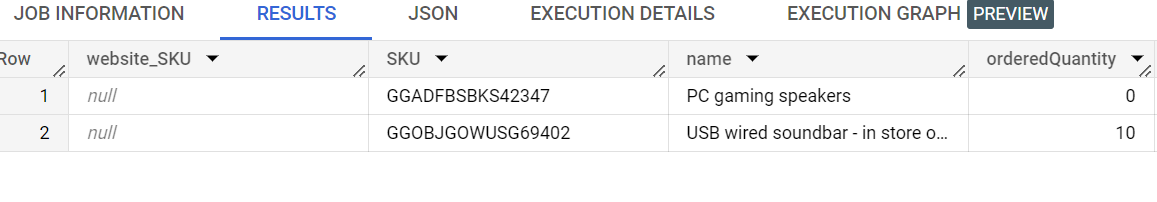

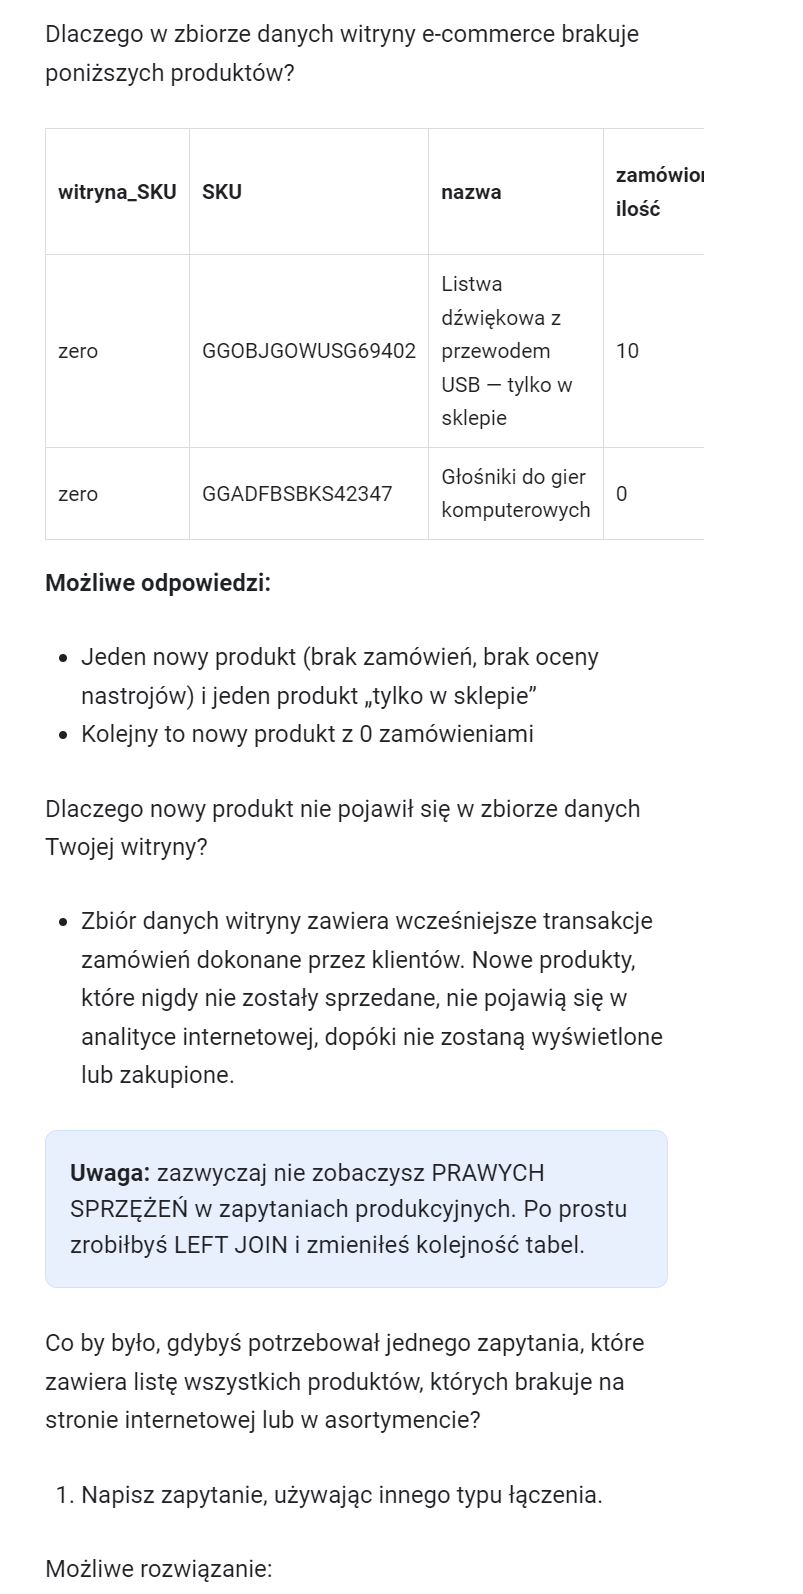

In [ ]:
%%bigquery

#standardSQL
SELECT DISTINCT
website.productSKU AS website_SKU,
inventory.SKU AS inventory_SKU
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
FULL JOIN `data-to-insights.ecommerce.products` AS inventory
ON website.productSKU = inventory.SKU
WHERE website.productSKU IS NULL OR inventory.SKU IS NULL

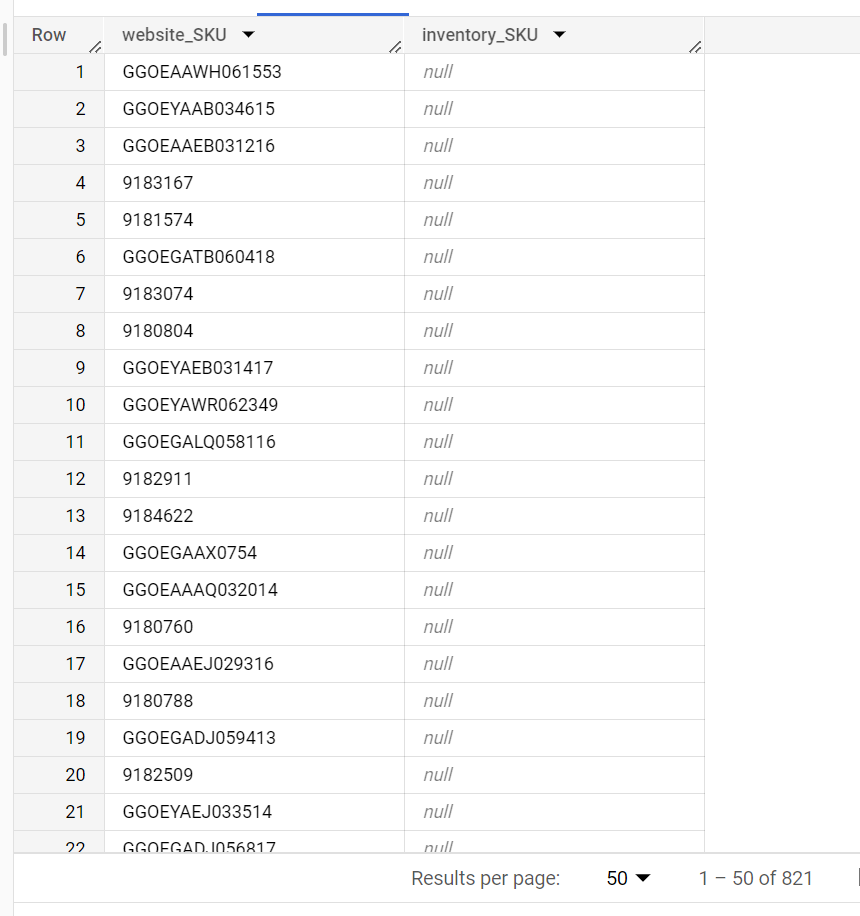

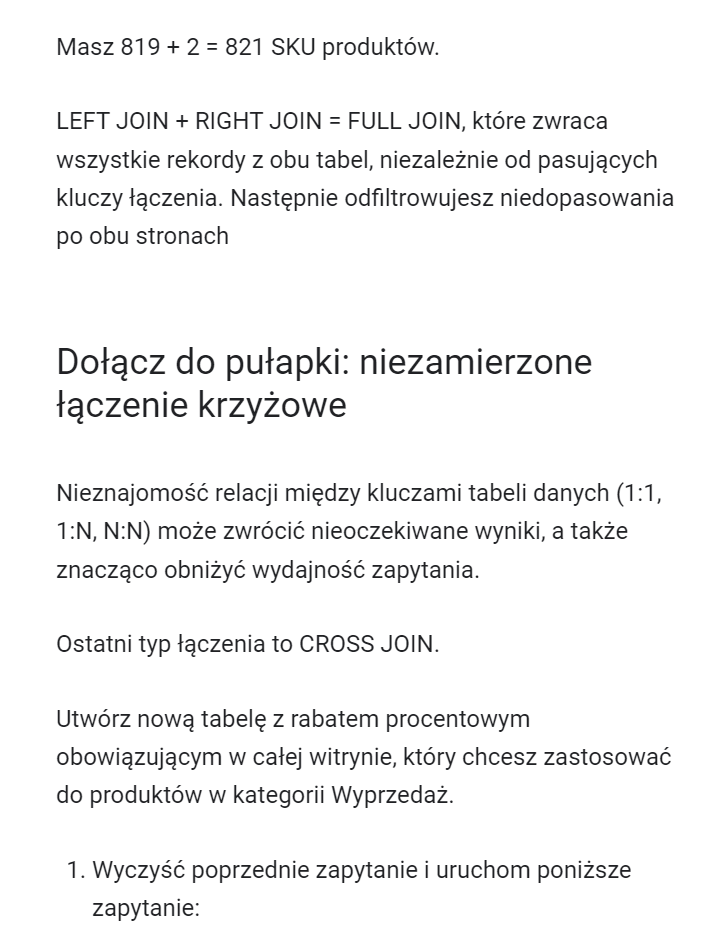

In [ ]:
%%bigquery

#standardSQL
CREATE OR REPLACE TABLE ecommerce.site_wide_promotion AS
SELECT .05 AS discount;

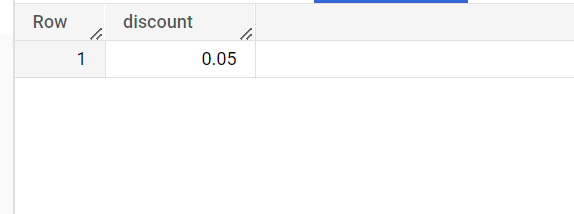

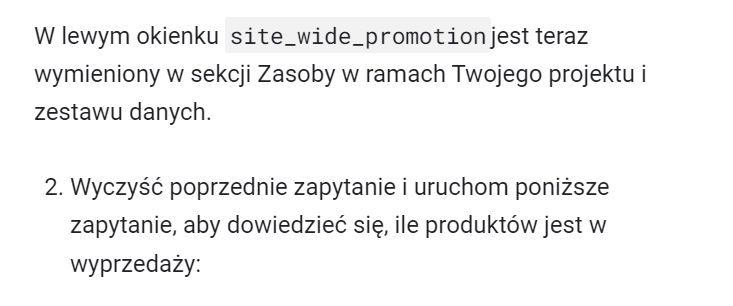

In [ ]:
%%bigquery

SELECT DISTINCT
productSKU,
v2ProductCategory,
discount
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
CROSS JOIN ecommerce.site_wide_promotion
WHERE v2ProductCategory LIKE '%Clearance%'

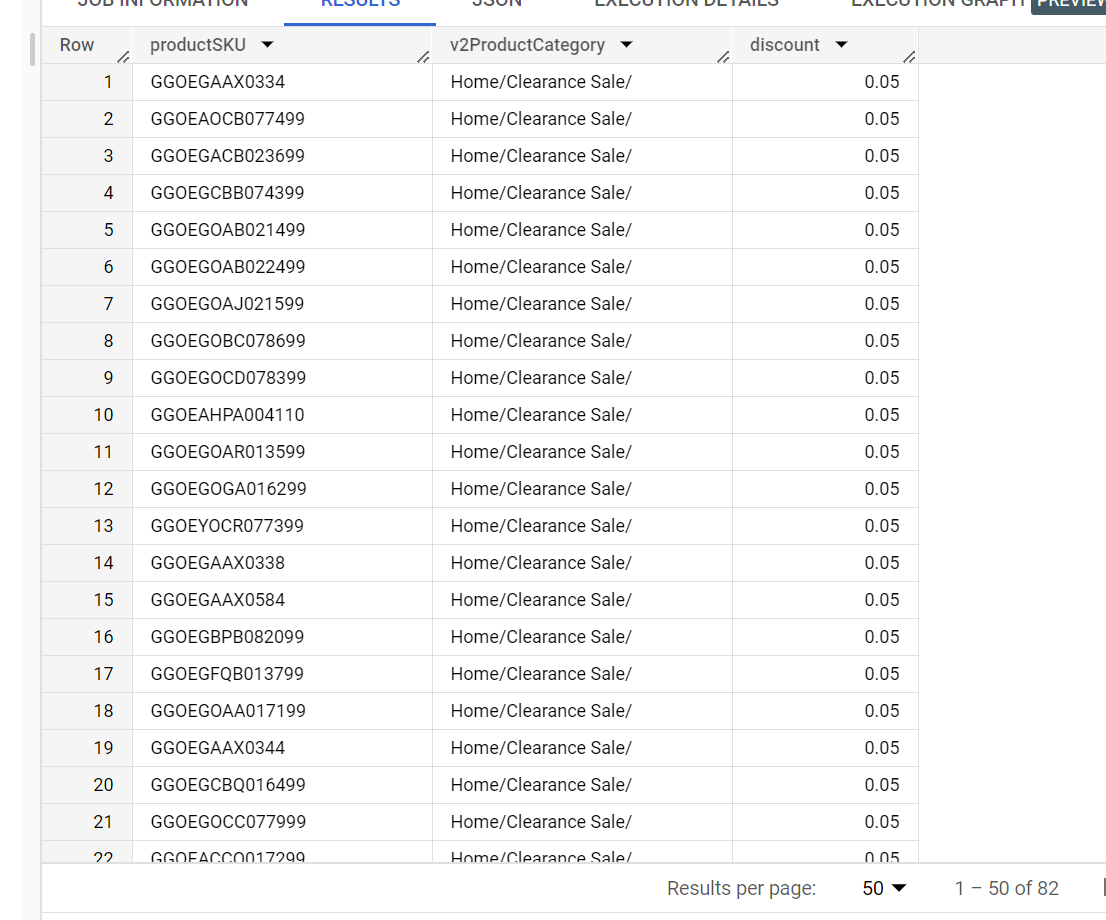

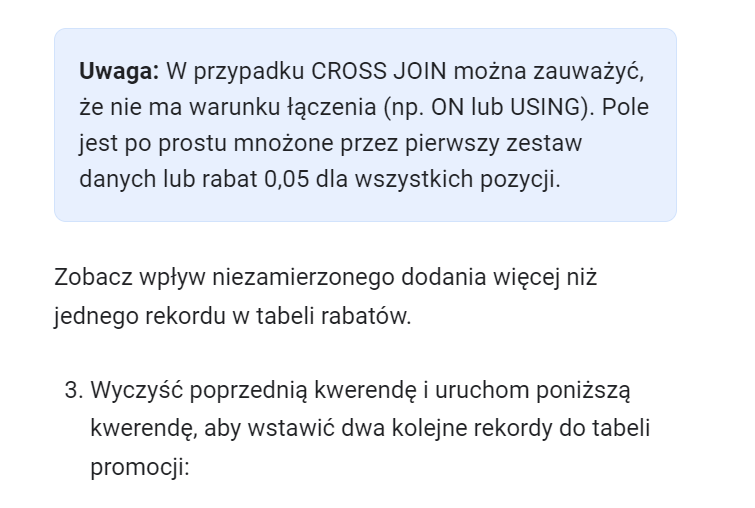

In [ ]:
%%bigquery

INSERT INTO ecommerce.site_wide_promotion (discount)
VALUES (.04),       (.03);

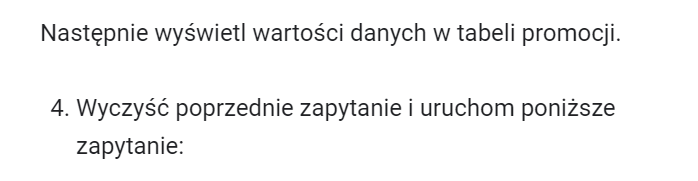

In [ ]:
%%bigquery

SELECT discount FROM ecommerce.site_wide_promotion

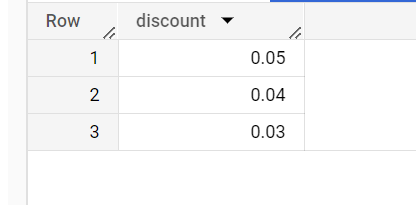

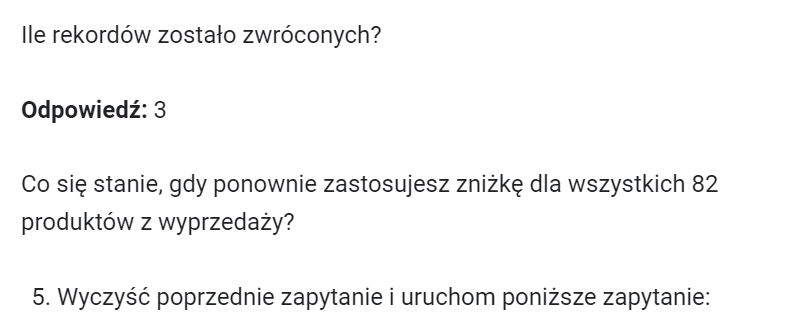

In [ ]:
%%bigquery

SELECT DISTINCT
productSKU,
v2ProductCategory,
discount
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
CROSS JOIN ecommerce.site_wide_promotion
WHERE v2ProductCategory LIKE '%Clearance%'

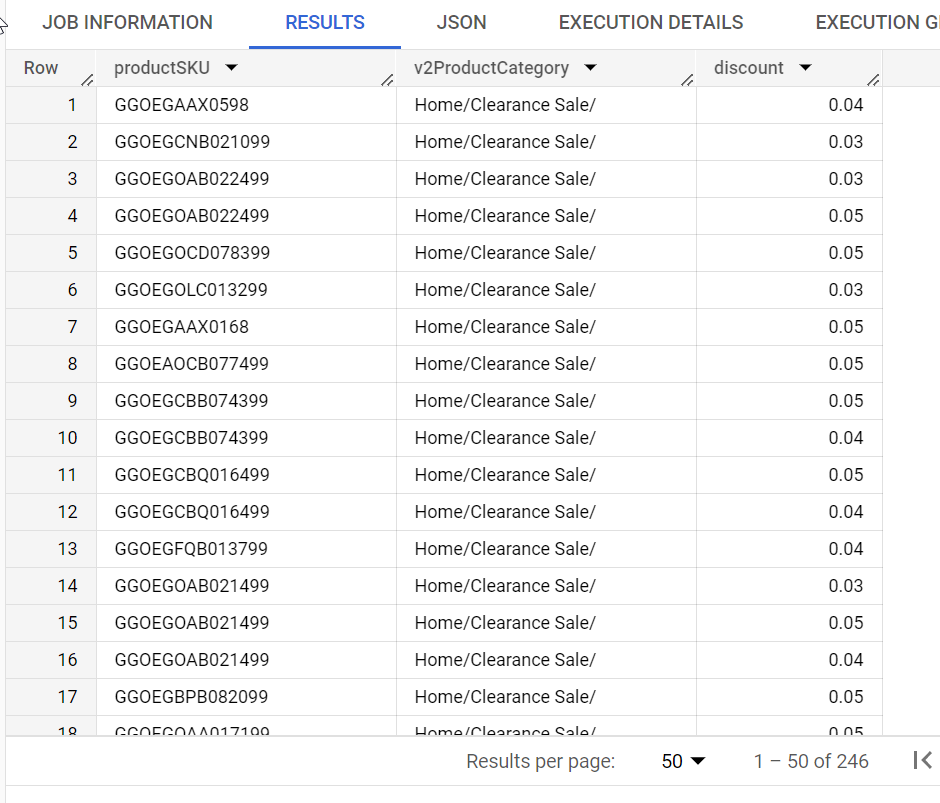

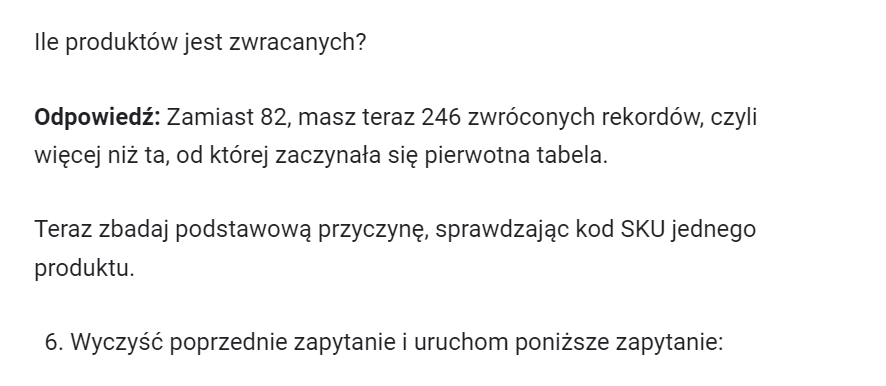

In [ ]:
%%bigquery

#standardSQL
SELECT DISTINCT
productSKU,
v2ProductCategory,
discount
FROM `data-to-insights.ecommerce.all_sessions_raw` AS website
CROSS JOIN ecommerce.site_wide_promotion
WHERE v2ProductCategory LIKE '%Clearance%'
AND productSKU = 'GGOEGOLC013299'

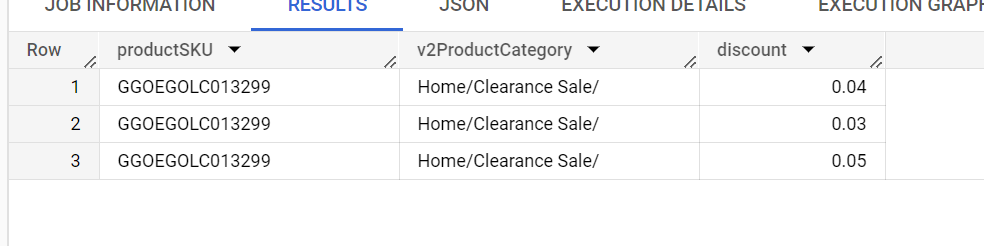

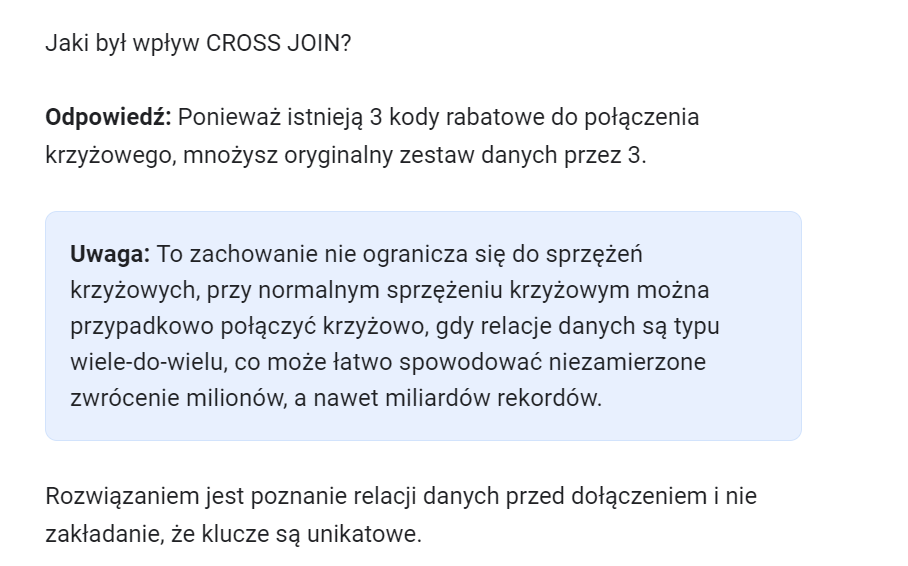